## Assignment 8

#### Name : Raswanth S.R
#### RollNum : CB.EN.U4CSE19648

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

### Social Network Ads 

#### Data Engineering

In [2]:
df = pd.read_csv("C:/Users/RASWANTH.SR/Desktop/ML Lab/FDS Lab/csv/Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.drop("Gender",axis=1,inplace=True)

In [5]:
df.isna().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### Model Building

In [6]:
X = df.drop("Purchased",axis = 1)

In [7]:
y = df["Purchased"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
stc = StandardScaler()
X_train = stc.fit_transform(X_train)
X_test = stc.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,leaf_size=30,weights="uniform")
classifier1.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
classifier1.score(X_test,y_test)

0.93

In [12]:
y_pred = classifier1.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 4, 28]], dtype=int64)

Text(69.0, 0.5, 'Truth')

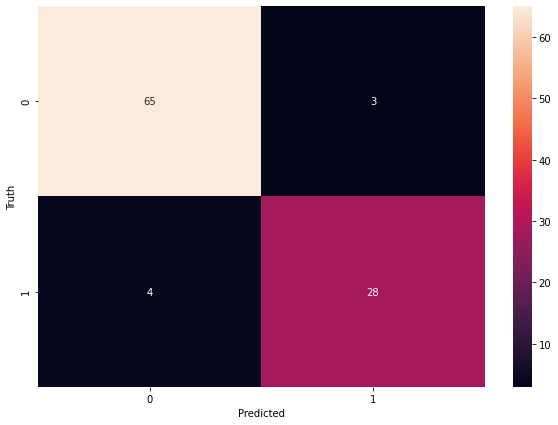

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        68
           1       0.90      0.88      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2,leaf_size=30,weights="uniform")
classifier2.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [17]:
classifier2.score(X_test,y_test)

0.93

In [18]:
y_pred = classifier2.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[65,  3],
       [ 4, 28]], dtype=int64)

Text(69.0, 0.5, 'Truth')

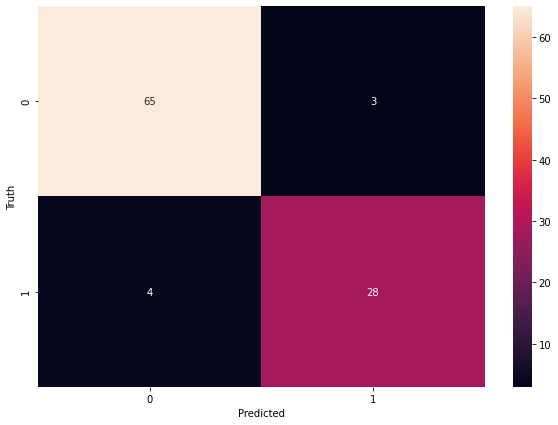

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        68
           1       0.90      0.88      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



### Iris Dataset

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
df = pd.DataFrame(data = iris.data,columns=iris.feature_names)

In [26]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
df['target'] = iris.target

In [28]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [29]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [30]:
df0 = df[:50]
df1= df[50:100]
df2 = df[100:]

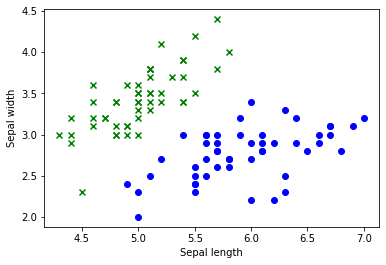

In [31]:
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='x')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='o')

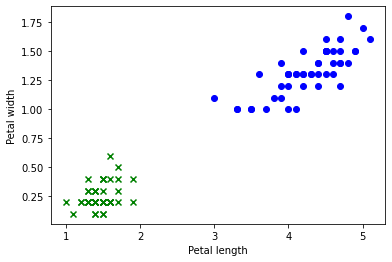

In [32]:
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='x')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='o')

In [33]:
X = df.drop(['target','flower_name'],axis = 1)
y = df.target

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [35]:
print(len(X_train),",",len(X_test))

120 , 30


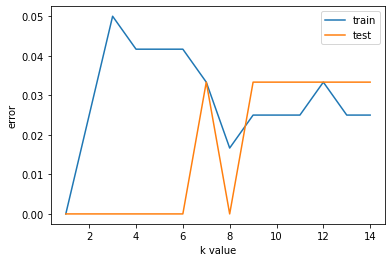

In [36]:
from sklearn.neighbors import KNeighborsClassifier
error1 = []
error2 = []
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_train)
    error1.append(np.mean(y_train!=y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test!=y_pred2))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k value')
plt.ylabel('error')
plt.legend()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto',n_neighbors=8, metric='minkowski', p=2,leaf_size=30,weights="uniform",metric_params=None,n_jobs=None,)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [38]:
knn.score(X_test,y_test)

1.0

In [39]:
y_pred = knn.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(69.0, 0.5, 'Truth')

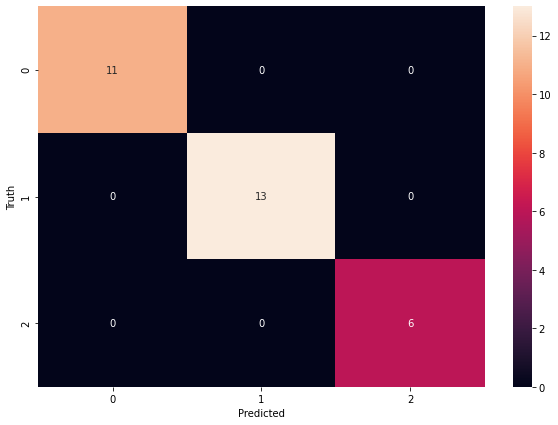

In [41]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [50]:
knn.predict([5.8,3.8])

ValueError: Expected 2D array, got 1D array instead:
array=[5.8 3.8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.